In [24]:
!pip install Librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [25]:
import os
from google.colab import drive
drive.mount('/content/drive')
path=os.chdir('/content/drive/MyDrive/多媒體程式設計')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace
----------------------------------------------------------------------------------------------------
(327222,)
[0.00037424 0.00036333 0.00024905 ... 0.00101743 0.0023917  0.0020072

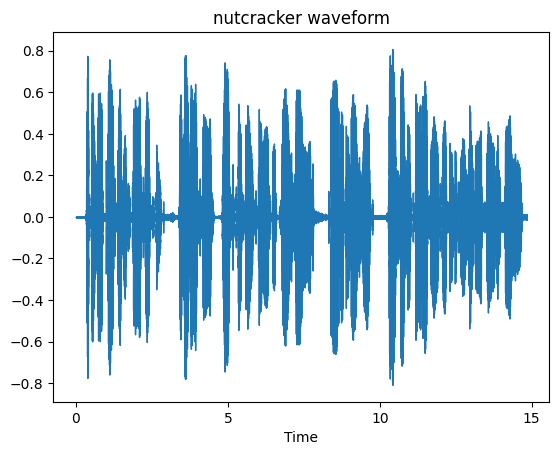

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

librosa.util.list_examples()
filename = librosa.example('libri1')
y, sr = librosa.load(filename,mono=False)
print('-'*100)
print(y.shape)
print(y)
print('-'*100)

plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.title('nutcracker waveform')
plt.show()

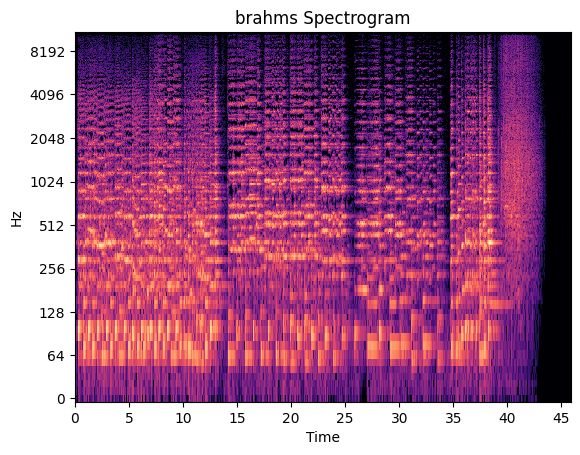

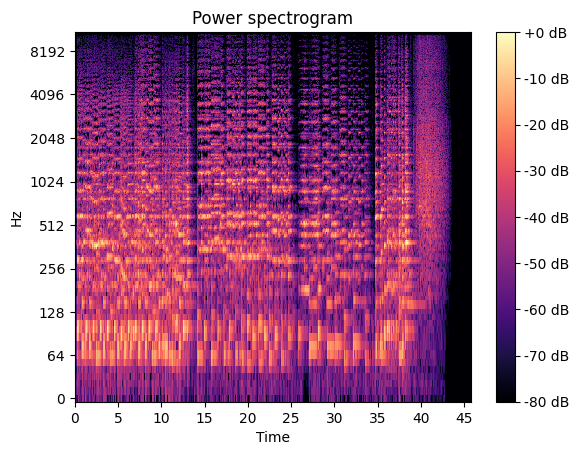

In [26]:
#短時距傅立葉變換
import librosa
import librosa.display
import numpy as np
filename = librosa.example('brahms')
y, sr = librosa.load(filename)
S = np.abs(librosa.stft(y))

#print('Spectrogram')
wav = librosa.amplitude_to_db(S, ref=np.max)
fig = plt.figure()
librosa.display.specshow(wav, y_axis='log', x_axis='time')
plt.title('brahms Spectrogram')
fig.show()

fig2, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig2.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

In [ ]:
#過零率
import librosa
import librosa.display

y, sr = librosa.load(librosa.example('brahms'))
result = librosa.feature.zero_crossing_rate(y)
print(result)
print(result.shape)
print('-'*100)

result2 = librosa.feature.zero_crossing_rate(y,frame_length=4096, hop_length=1024)
print(result2)
print(result2.shape)

[[0.24169922 0.37255859 0.48193359 ... 0.53710938 0.45507812 0.31689453]]
(1, 1975)
----------------------------------------------------------------------------------------------------
[[0.2409668  0.27001953 0.28320312 0.17578125 0.07592773 0.0690918
  0.06542969 0.05761719 0.05224609 0.04956055 0.06445312 0.08203125
  0.08691406 0.0859375  0.08691406 0.08618164 0.08496094 0.07836914
  0.06591797 0.06225586 0.06323242 0.07250977 0.0847168  0.08789062
  0.09423828 0.09838867 0.08398438 0.07055664 0.06054688 0.05908203
  0.07250977 0.08862305 0.09350586 0.09228516 0.08691406 0.08398438
  0.08178711 0.07763672 0.08422852 0.08764648 0.09667969 0.09619141
  0.09326172 0.078125   0.06323242 0.05932617 0.05639648 0.06445312
  0.06713867 0.06494141 0.05981445 0.06762695 0.06274414 0.06176758
  0.06591797 0.0534668  0.06274414 0.07446289 0.07324219 0.0769043
  0.07446289 0.0637207  0.05322266 0.0480957  0.04760742 0.05102539
  0.06713867 0.07861328 0.07543945 0.07836914 0.07397461 0.06811523
 

[[5544.18974496 5724.29320085 5965.34502129 ... 5878.20588719
  5852.67862143 5822.86214732]]
(1, 1975)
----------------------------------------------------------------------------------------------------
[[5544.18974496 5724.29320085 5965.34502129 ... 5878.20588719
  5852.67862143 5822.86214732]]
(1, 1975)


[Text(0.5, 1.0, 'log Power spectrogram')]

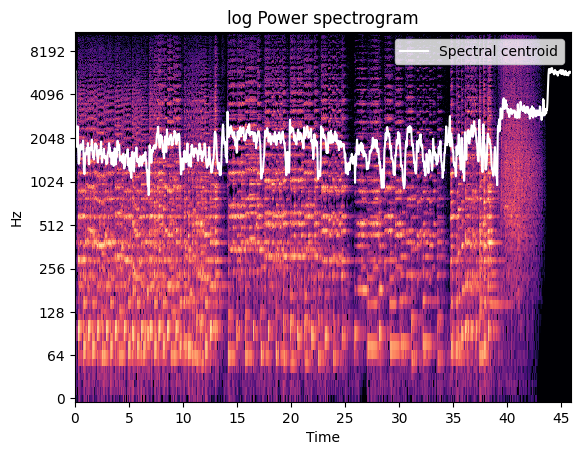

In [ ]:
#質譜中心
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt 

y, sr = librosa.load(librosa.ex('brahms'))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
print(cent)
print(cent.shape)
print('-'*100)
y_stft=librosa.stft(y=y)
S=np.abs(y_stft)
#S, phase = librosa.magphase(librosa.stft(y=y))
cent2 = librosa.feature.spectral_centroid(S=S)
print(cent2)
print(cent2.shape)

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

[[-588.30237 -588.30237 -588.30237 ... -588.30237 -588.30237 -588.30237]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]]
(20, 1975)
----------------------------------------------------------------------------------------------------
[[-588.9495    -588.9495    -559.3972    ... -588.9495    -588.9495
  -588.9495   ]
 [   0.           0.          37.383247  ...    0.           0.
     0.       ]
 [   0.           0.          26.165644  ...    0.           0.
     0.       ]
 ...
 [   0.           0.          -5.5779924 ...    0.           0.
     0.       ]
 [   0.           0.         -11.63726   ...    0.           0.
     0.       ]
 [   0.           0.         -13.62

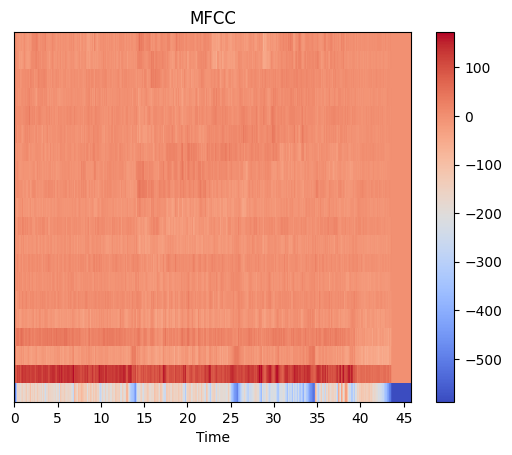

In [ ]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 計算梅爾頻率倒譜係數
filename = librosa.example('brahms')
y, sr = librosa.load(filename)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs)
print(mfccs.shape)
print('-'*100)

mfccs2 = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)
print(mfccs2)
print(mfccs2.shape)
print('-'*100)
mfccs3 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

print(mfccs3)
print(mfccs3.shape)

# 繪製梅爾頻率倒譜係數圖
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.show()

In [ ]:
y, sr = librosa.load(librosa.example('choice'), duration=10)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(tempo)
print(beats)
print('-'*100)

beat_times = librosa.frames_to_time(beats, sr=sr)
print(beat_times)




135.99917763157896
[  3  21  40  59  78  96 116 135 154 173 192 211 230 249 268 287 306 325
 344 363]
----------------------------------------------------------------------------------------------------
[0.06965986 0.48761905 0.92879819 1.36997732 1.81115646 2.22911565
 2.69351474 3.13469388 3.57587302 4.01705215 4.45823129 4.89941043
 5.34058957 5.78176871 6.22294785 6.66412698 7.10530612 7.54648526
 7.9876644  8.42884354]


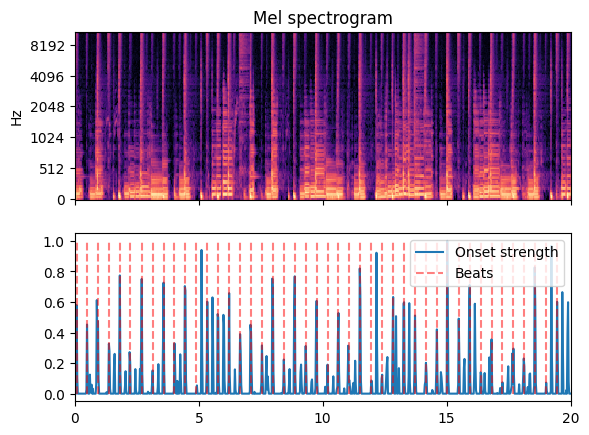

In [ ]:
#tempo and beats
import matplotlib.pyplot as plt
filename = librosa.example('choice')
y, sr = librosa.load(filename, duration=20)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max), y_axis='mel', x_axis='time', hop_length=hop_length, ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()